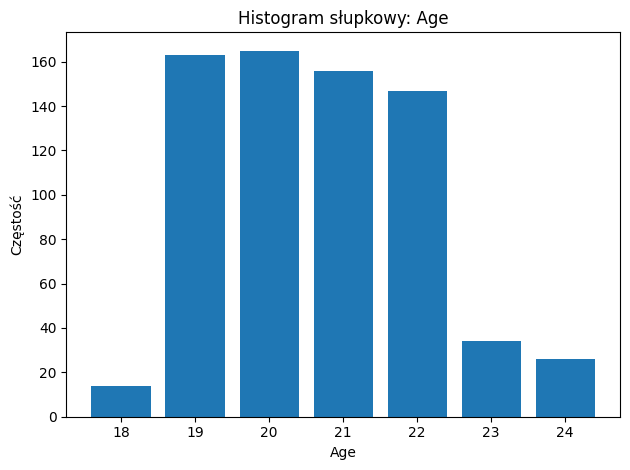

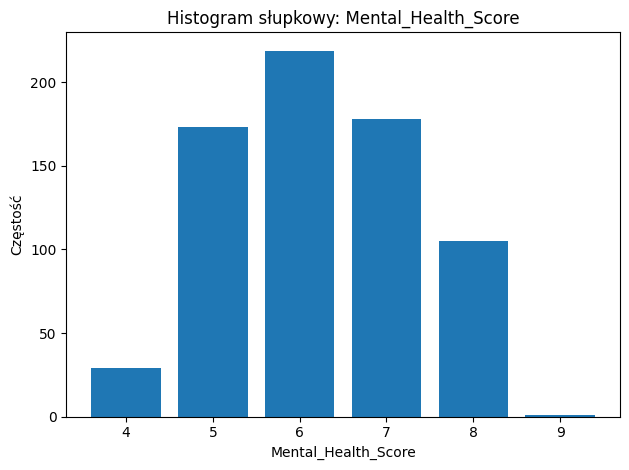

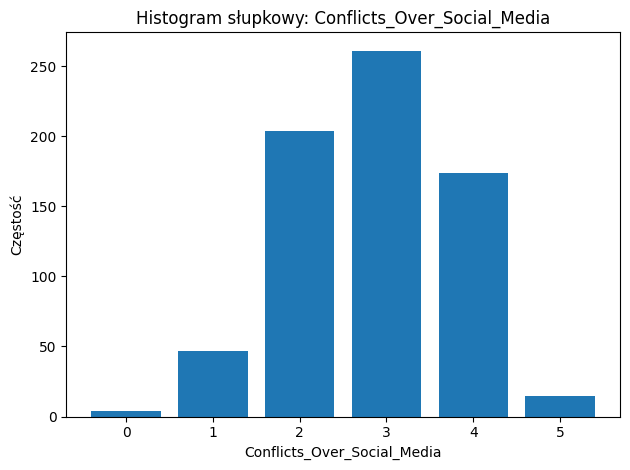

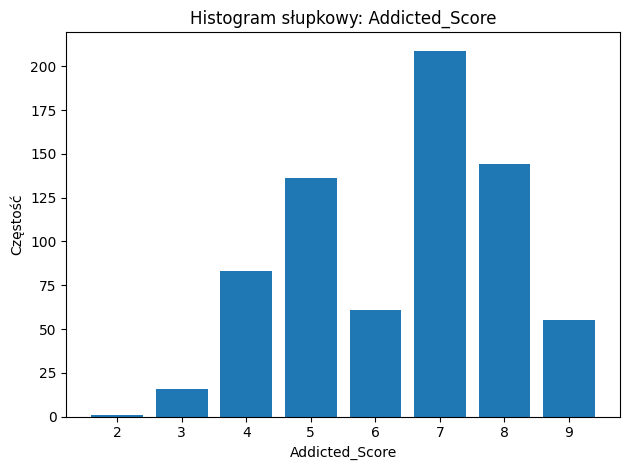

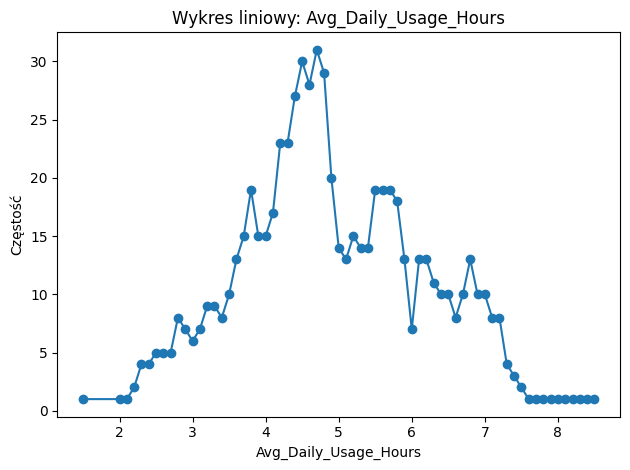

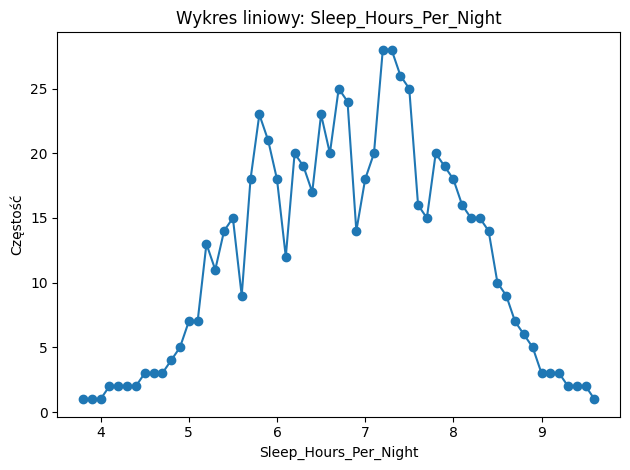

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("dataset/Students Social Media Addiction.csv")

# kolumny do histogramów słupkowych (liczbowe poza Avg_Daily_Usage_Hours i Sleep_Hours_Per_Night)
bar_cols = [
    col for col in df.select_dtypes(include="number").columns
    if col not in ["Student_ID", "Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night"]
]

# rysowanie histogramów słupkowych
for col in bar_cols:
    counts = df[col].value_counts().sort_index()
    plt.figure()
    plt.bar(counts.index, counts.values)
    plt.xlabel(col)
    plt.ylabel("Częstość")
    plt.title(f"Histogram słupkowy: {col}")
    plt.tight_layout()
    plt.show()

# kolumny do wykresów liniowych
line_cols = ["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night"]

# rysowanie wykresów liniowych
for col in line_cols:
    counts = df[col].value_counts().sort_index()
    plt.figure()
    plt.plot(counts.index, counts.values)
    plt.scatter(counts.index, counts.values)  # punkty dla czytelności
    plt.xlabel(col)
    plt.ylabel("Częstość")
    plt.title(f"Wykres liniowy: {col}")
    plt.tight_layout()
    plt.show()


## Przygotowanie Danych

- usuwanie kolumny Student_id
- zmiana wartości kategorycznych na numeryczne
- stworzenie nowej kolumny z coutry na Region z powodu małej liczby powtórzeń krajów
- usuwanie przypadków odstających w godzinach używania social media i godzinach snu (jeśli takie istnieją)

In [108]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown
import country_converter as coco
import pandas as pd

df = pd.read_csv("dataset/Students Social Media Addiction.csv")

# Tworzenie z krajów kolumnę region
if "Country" in df.columns:
    override = {"UAE": "United Arab Emirates"}
    df["Country"] = df["Country"].replace(override)
    df["Region"] = coco.convert(names=df["Country"], to="continent")

#usuwanie niepotrzebnych kolumn
cols_to_drop = ["Country", "Student_ID"]
for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=col, inplace=True)
cols = ["Gender",
        "Affects_Academic_Performance",
        "Academic_Level",
        "Most_Used_Platform",
        "Relationship_Status",
        "Region"]
#zmiana wartości kategorycznych na numeryczne

hotcodingtables = {}

for col in cols:
    le = LabelEncoder()
    le.fit(df[col])
    # zbuduj DataFrame z mappingiem
    mapping_df = pd.DataFrame({
        "Kategoria": le.classes_,
        "Kod": range(len(le.classes_))
    })
    hotcodingtables[col] = mapping_df

    # nagłówek i wyświetlenie
    display(Markdown(f"### Mapowanie dla kolumny `{col}`"))
    display(mapping_df)

le = LabelEncoder()
for col in ["Gender", "Affects_Academic_Performance", "Academic_Level", "Most_Used_Platform", "Relationship_Status",
            "Region"]:
    df[col] = le.fit_transform(df[col])
# usuwanie przypadków odstających

cols = ["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night"]

iqr_bounds = {}
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_bounds[col] = (lower, upper)

# 2) tworzymy maskę na akceptowalne
mask_iqr = pd.Series(True, index=df.index)
for col, (lower, upper) in iqr_bounds.items():
    mask_iqr &= df[col].between(lower, upper)

# 3) wiersze-odstające:
outliers_iqr = df[~mask_iqr]
print("Outliery według IQR:")

print(outliers_iqr[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night"]])

# 2) tworzymy maskę na akceptowalne
mask_iqr = pd.Series(True, index=df.index)
for col, (lower, upper) in iqr_bounds.items():
    mask_iqr &= df[col].between(lower, upper)

### Mapowanie dla kolumny `Gender`

,Kategoria,Kod
0,Female,0
1,Male,1


### Mapowanie dla kolumny `Affects_Academic_Performance`

,Kategoria,Kod
0,No,0
1,Yes,1


### Mapowanie dla kolumny `Academic_Level`

,Kategoria,Kod
0,Graduate,0
1,High School,1
2,Undergraduate,2


### Mapowanie dla kolumny `Most_Used_Platform`

,Kategoria,Kod
0,Facebook,0
1,Instagram,1
2,KakaoTalk,2
3,LINE,3
4,LinkedIn,4
5,Snapchat,5
6,TikTok,6
7,Twitter,7
8,VKontakte,8
9,WeChat,9


### Mapowanie dla kolumny `Relationship_Status`

,Kategoria,Kod
0,Complicated,0
1,In Relationship,1
2,Single,2


### Mapowanie dla kolumny `Region`

,Kategoria,Kod
0,Africa,0
1,America,1
2,Asia,2
3,Europe,3
4,Oceania,4


Outliery według IQR:
     Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night
6                      1.5                    8.0
486                    8.4                    3.9
496                    8.5                    3.8


## Korelacja Zmiennych part 1



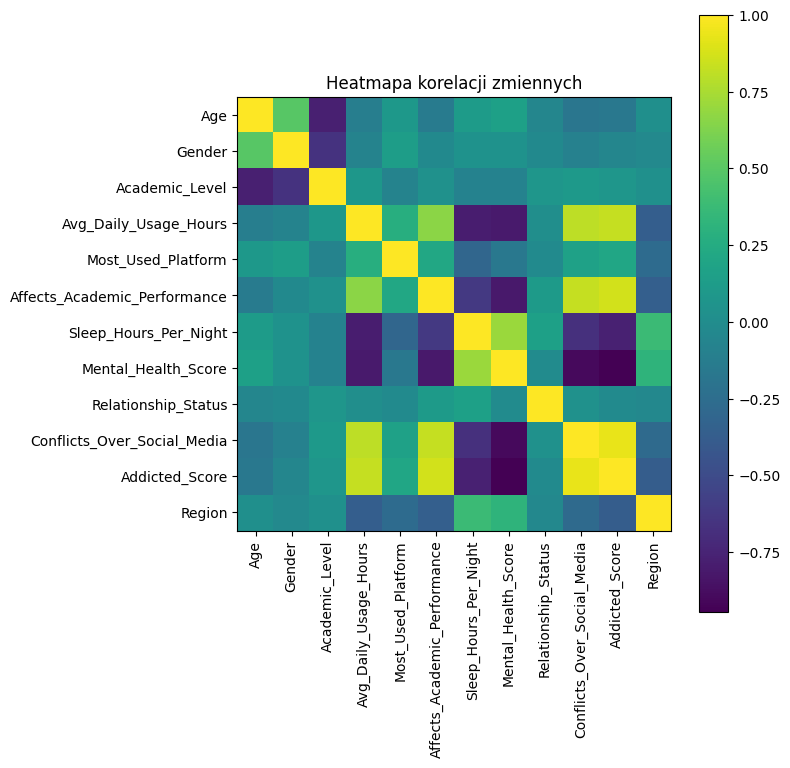

In [109]:
import matplotlib.pyplot as plt

# 2. Oblicz macierz korelacji
corr = df.corr()

# Heatmapa
plt.figure(figsize=(8, 8))
plt.imshow(corr, aspect='equal')
plt.colorbar()
# opisy osi
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Heatmapa korelacji zmiennych")
plt.tight_layout()
plt.show()

## Korelacja zmiennych part 2



In [113]:
import scipy.stats as st

# t-test między płciami
m = df[df.Gender==0].Addicted_Score
f = df[df.Gender==1].Addicted_Score
print("t-test p-value:", st.ttest_ind(m, f, nan_policy="omit").pvalue)


t-test p-value: 0.18754394786021147
